# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [81]:
import pandas as pd
covid_data2 = pd.read_csv(r"C:\Users\vidit\Desktop\AI Development\ML 1\Task5\04-10-2021.csv")

#### Display the top 5 rows in the data

In [83]:
covid_data2.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-04-11 04:20:56,33.93911,67.709953,57144,2521,51962.0,2661.0,Afghanistan,146.792796,4.411662
1,NaN,NaN,NaN,Albania,2021-04-11 04:20:56,41.15330,20.168300,128155,2310,97206.0,28639.0,Albania,4453.228160,1.802505
2,NaN,NaN,NaN,Algeria,2021-04-11 04:20:56,28.03390,1.659600,118378,3126,82493.0,32759.0,Algeria,269.954810,2.640693
3,NaN,NaN,NaN,Andorra,2021-04-11 04:20:56,42.50630,1.521800,12497,120,11770.0,607.0,Andorra,16174.205656,0.960230
4,NaN,NaN,NaN,Angola,2021-04-11 04:20:56,-11.20270,17.873900,23331,550,21890.0,891.0,Angola,70.987676,2.357379


#### Show the information of the dataset

In [84]:
covid_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            737 non-null    float64
 10  Active               737 non-null    float64
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3968 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 439.2+ KB


#### Show the sum of missing values of features in the dataset

In [85]:
covid_data2.isnull().sum()

FIPS                    748
Admin2                  743
Province_State          179
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3277
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      46
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [86]:
covid_data2.groupby('Country_Region')['Confirmed'].sum().reset_index()

,Country_Region,Confirmed
0,Afghanistan,57144
1,Albania,128155
2,Algeria,118378
3,Andorra,12497
4,Angola,23331
...,...,...
196,West Bank and Gaza,265897
197,Winter Olympics 2022,0
198,Yemen,5276
199,Zambia,89918


#### Show the number of Deaths by Country

In [87]:
covid_data2.groupby('Country_Region')['Deaths'].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,2521
1,Albania,2310
2,Algeria,3126
3,Andorra,120
4,Angola,550
...,...,...
196,West Bank and Gaza,2838
197,Winter Olympics 2022,0
198,Yemen,1031
199,Zambia,1226


#### Show the number of Recovered cases by Country

In [88]:
covid_data2.groupby('Country_Region')['Recovered'].sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,51962.0
1,Albania,97206.0
2,Algeria,82493.0
3,Andorra,11770.0
4,Angola,21890.0
...,...,...
196,West Bank and Gaza,231288.0
197,Winter Olympics 2022,0.0
198,Yemen,2027.0
199,Zambia,86813.0


#### Show the number of Active Cases by Country

In [89]:
covid_data2.groupby('Country_Region')['Active'].sum().reset_index()

,Country_Region,Active
0,Afghanistan,2661.0
1,Albania,28639.0
2,Algeria,32759.0
3,Andorra,607.0
4,Angola,891.0
...,...,...
196,West Bank and Gaza,31771.0
197,Winter Olympics 2022,0.0
198,Yemen,2218.0
199,Zambia,1879.0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [90]:
covid_data2['Last_Update'] = pd.to_datetime(covid_data2['Last_Update'])
latest_entries = covid_data2.groupby('Country_Region')['Last_Update'].idxmax()
covid_data2.loc[latest_entries][['Country_Region', 'Confirmed','Deaths','Recovered','Active']].reset_index()

,index,Country_Region,Confirmed,Deaths,Recovered,Active
0,0,Afghanistan,57144,2521,51962.0,2661.0
1,1,Albania,128155,2310,97206.0,28639.0
2,2,Algeria,118378,3126,82493.0,32759.0
3,3,Andorra,12497,120,11770.0,607.0
4,4,Angola,23331,550,21890.0,891.0
...,...,...,...,...,...,...
196,3978,West Bank and Gaza,265897,2838,231288.0,31771.0
197,4004,Winter Olympics 2022,0,0,0.0,0.0
198,3979,Yemen,5276,1031,2027.0,2218.0
199,3980,Zambia,89918,1226,86813.0,1879.0


### Question 3

### Show the countries with no recovered cases

In [91]:
zero_recovered = covid_data2.groupby('Country_Region')['Recovered'].sum()
zero_recovered[zero_recovered == 0]

Country_Region
Antarctica              0.0
Belgium                 0.0
Kiribati                0.0
Korea, North            0.0
Nauru                   0.0
Palau                   0.0
Serbia                  0.0
Summer Olympics 2020    0.0
Sweden                  0.0
Tonga                   0.0
Tuvalu                  0.0
US                      0.0
Winter Olympics 2022    0.0
Name: Recovered, dtype: float64

#### Show the countries with no confirmed cases

In [92]:
zero_confirmed = covid_data2.groupby('Country_Region')['Confirmed'].sum()
zero_confirmed[zero_confirmed == 0]

Country_Region
Antarctica              0
Kiribati                0
Korea, North            0
Nauru                   0
Palau                   0
Summer Olympics 2020    0
Tonga                   0
Tuvalu                  0
Winter Olympics 2022    0
Name: Confirmed, dtype: int64

#### Show the countries with no deaths

In [93]:
zero_deaths = covid_data2.groupby('Country_Region')['Deaths'].sum()
zero_deaths[zero_deaths == 0]

Country_Region
Antarctica               0
Dominica                 0
Holy See                 0
Kiribati                 0
Korea, North             0
Laos                     0
Marshall Islands         0
Micronesia               0
Nauru                    0
Palau                    0
Saint Kitts and Nevis    0
Samoa                    0
Solomon Islands          0
Summer Olympics 2020     0
Tonga                    0
Tuvalu                   0
Vanuatu                  0
Winter Olympics 2022     0
Name: Deaths, dtype: int64

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [94]:
covid_data2.groupby('Country_Region')['Confirmed'].sum().nlargest(10)

Country_Region
US                31274551
Brazil            13451932
India             13358805
France             5001723
Russia             4580633
United Kingdom     4382878
Turkey             3798333
Italy              3754077
Spain              3347512
Germany            2991324
Name: Confirmed, dtype: int64

#### Show the Top 10 Countries with Active cases

In [95]:
covid_data2.groupby('Country_Region')['Active'].sum().nlargest(10)

Country_Region
France            4590449.0
United Kingdom    4242062.0
Spain             3120808.0
Mexico            2069208.0
Peru              1488916.0
Brazil            1354023.0
Netherlands       1331031.0
India             1108087.0
Belgium            905165.0
Sweden             843780.0
Name: Active, dtype: float64

### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [96]:
import matplotlib.pyplot as plt

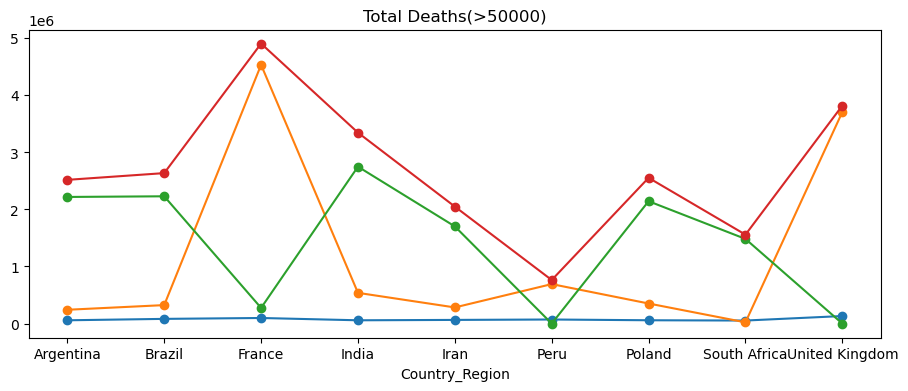

In [97]:
data = covid_data2[covid_data2['Deaths'] > 50000]
data2 = data.groupby('Country_Region').agg({
    'Deaths':'sum',
    'Confirmed':'sum',
    'Recovered':'sum',
    'Active':'sum'
}).reset_index()
fig, ax=plt.subplots(figsize=(11,4))
data2.plot(ax=ax,x='Country_Region', y=['Deaths', 'Active', 'Recovered','Confirmed'], kind='line', marker='o',legend=False)
plt.title('Total Deaths(>50000)')
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [2]:
import plotly.express as px

In [6]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [98]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

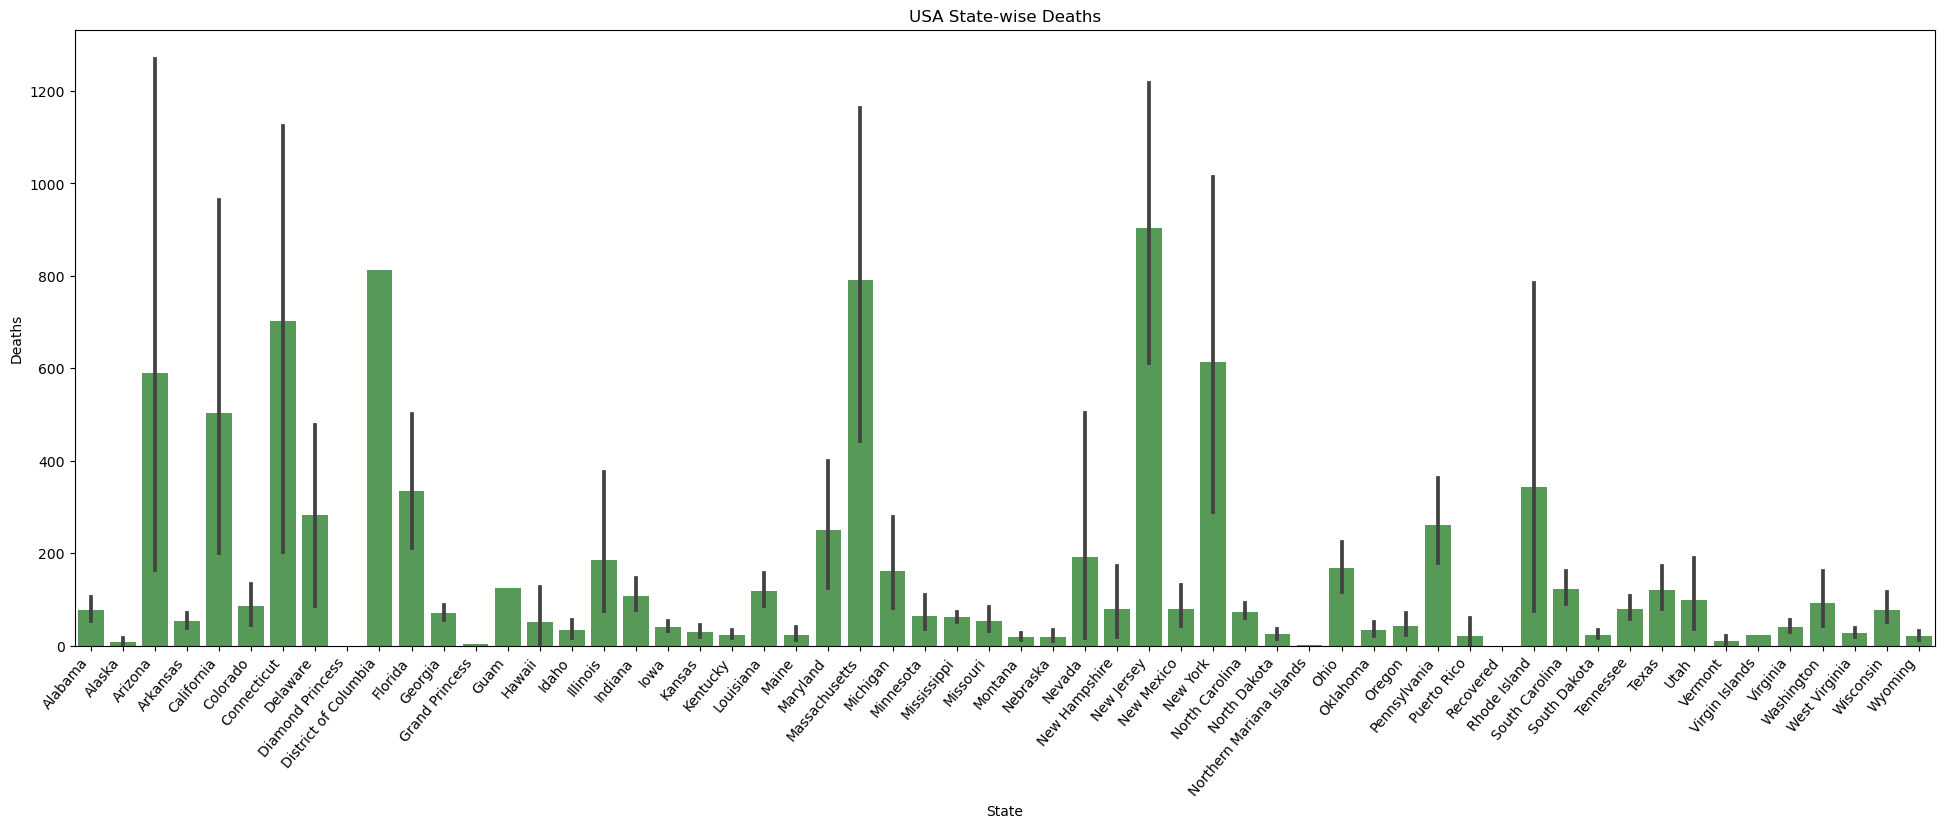

In [99]:
import seaborn as sns
USA = covid_data[covid_data['Country_Region'] == 'US']
USA = USA.dropna(subset=['Province_State'])
States_data = USA[['Province_State', 'Deaths']]
States_data.set_index('Province_State', inplace=True)

plt.figure(figsize=(24, 8))
sns.barplot(x=States_data.index, y='Deaths', data=States_data, color='green', alpha=0.7)


plt.xlabel('State')
plt.ylabel('Deaths')
plt.title('USA State-wise Deaths')
plt.xticks(rotation=50, ha='right')

plt.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

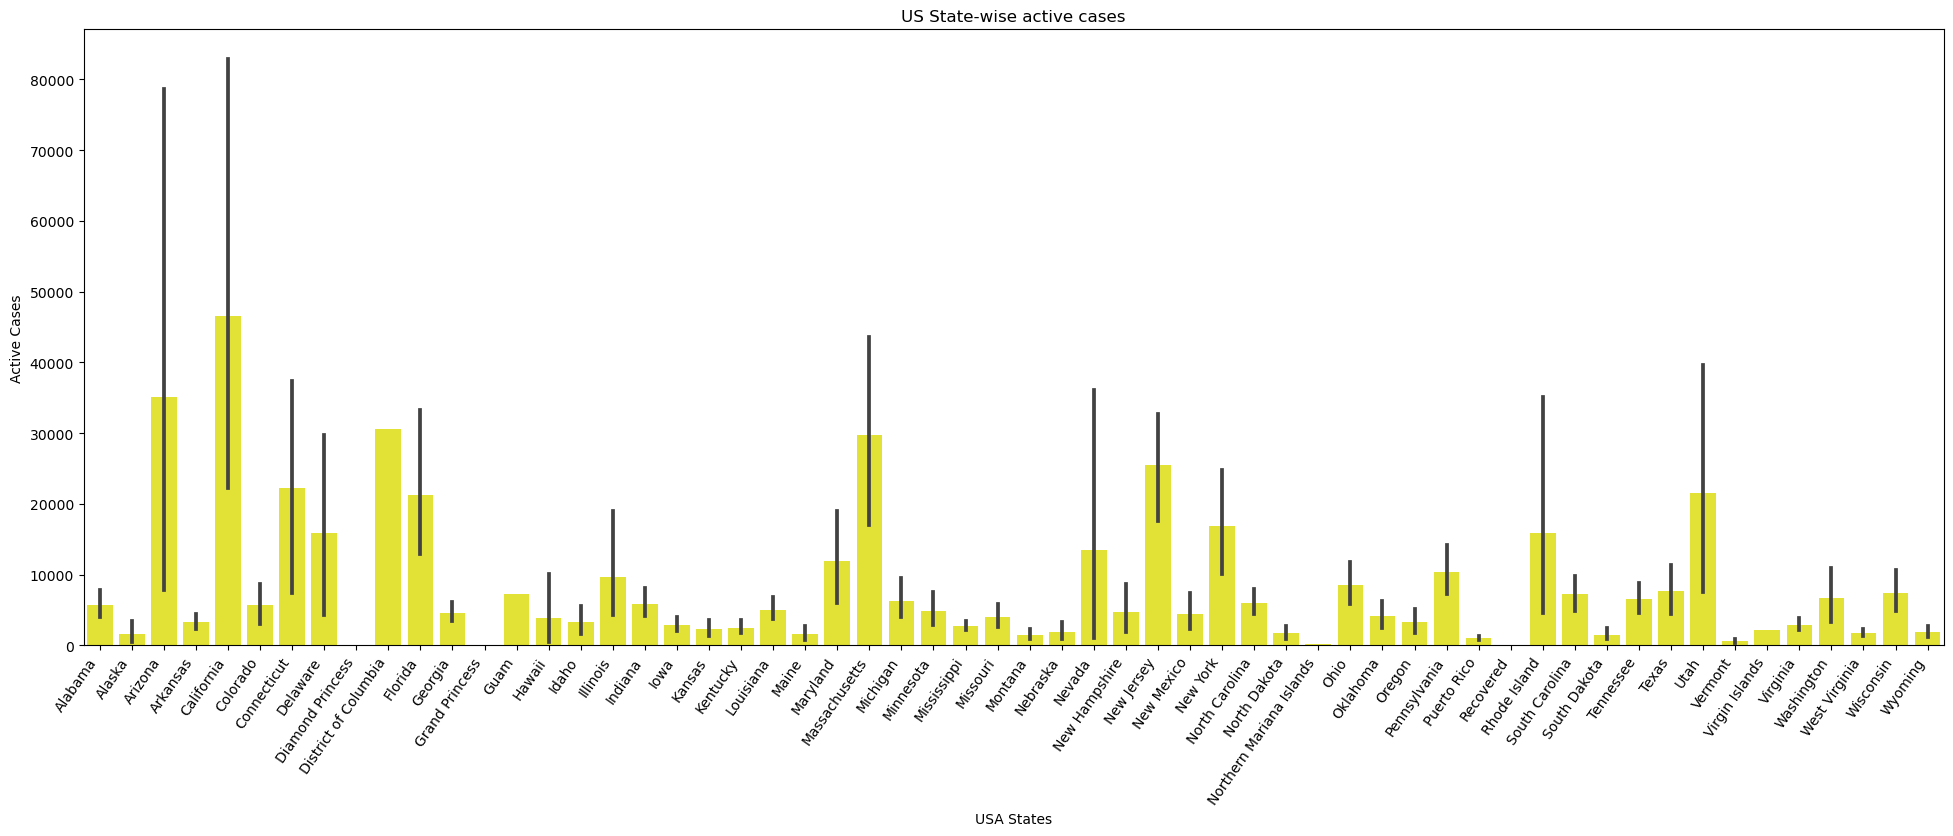

In [38]:
USA = covid_data[covid_data['Country_Region'] == 'US']
USA = USA.dropna(subset=['Province_State'])
USA['Active'] = USA['Confirmed'] - USA['Deaths'] - USA['Recovered']
States_data = USA[['Province_State', 'Active']]
States_data.set_index('Province_State', inplace=True)
plt.figure(figsize=(24, 8))
sns.barplot(x=States_data.index, y='Active', data=States_data, color='yellow', alpha=0.9)
plt.xlabel('USA States')
plt.ylabel('Active Cases')
plt.title('US State-wise active cases')
plt.xticks(rotation=55, ha='right')
plt.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

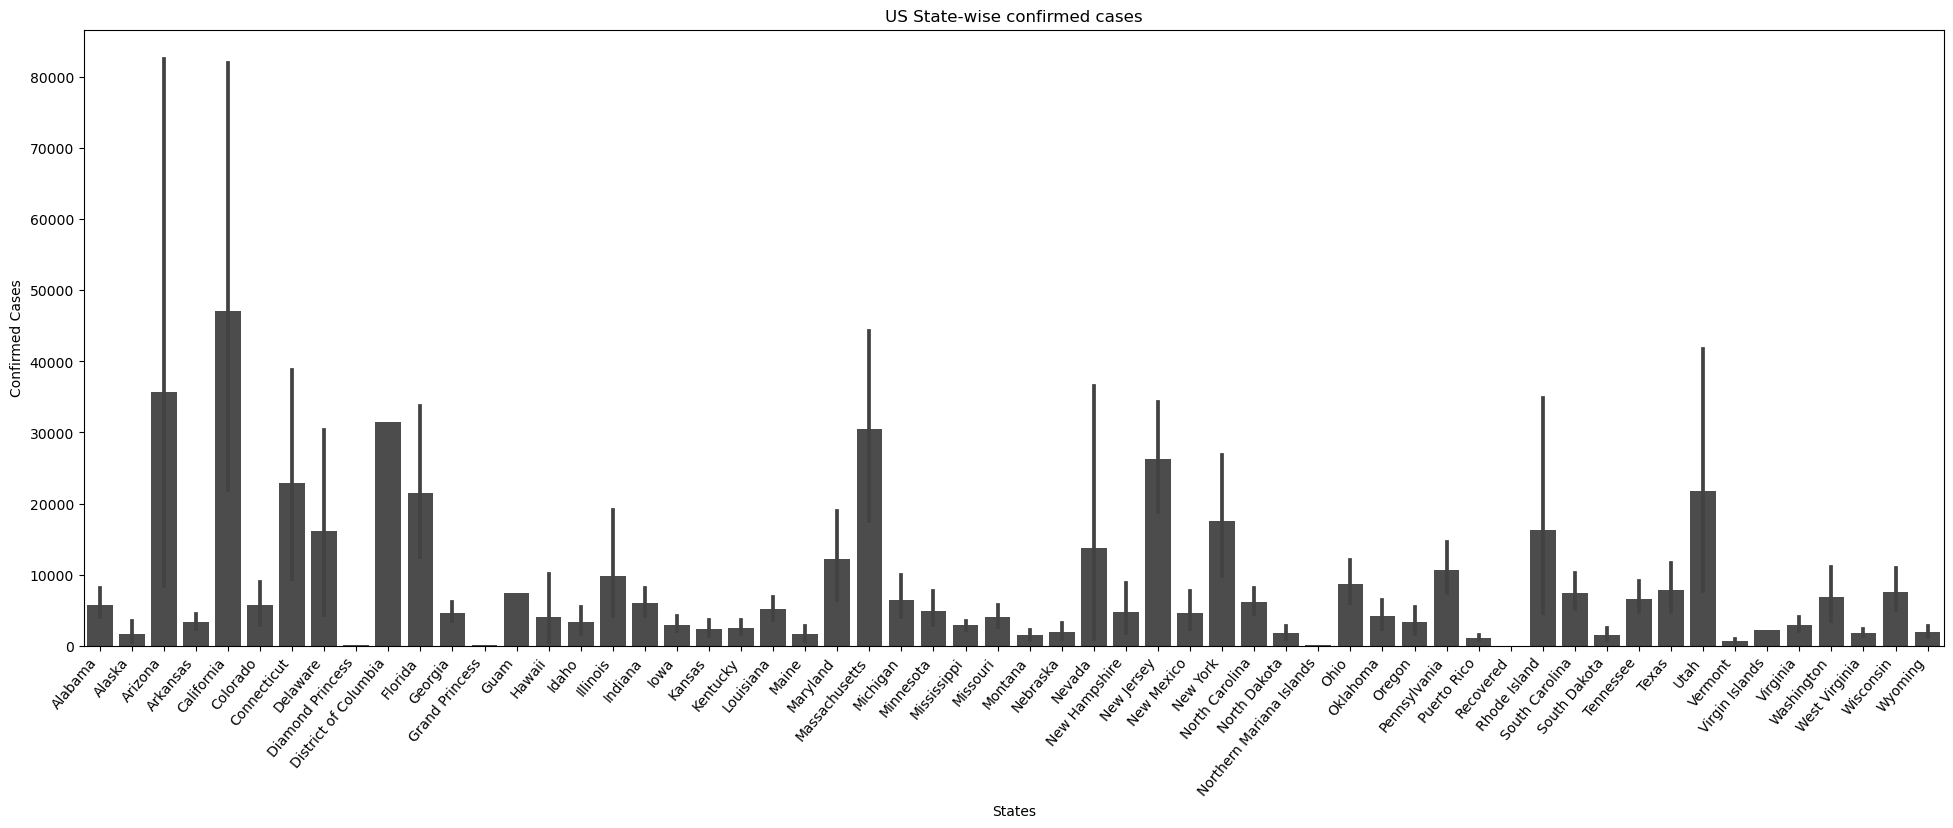

In [37]:
USA = covid_data[covid_data['Country_Region'] == 'US']
USA = USA.dropna(subset=['Province_State'])
States_data = USA[['Province_State', 'Confirmed']]
States_data.set_index('Province_State', inplace=True)
plt.figure(figsize=(24, 8))
sns.barplot(x=States_data.index, y='Confirmed', data=States_data, color='black', alpha=0.7)
plt.xlabel('States')
plt.ylabel('Confirmed Cases')
plt.title('US State-wise confirmed cases')
plt.xticks(rotation=50, ha='right')
plt.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [28]:
import plotly.express as px
import plotly.io as pio

In [36]:
worldwide_confirmed_over_time = covid_data.groupby('Last_Update')['Confirmed'].sum().reset_index()
fig = px.line(worldwide_confirmed_over_time, x='Last_Update', y='Confirmed', title='Worldwide Confirmed Cases Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Confirmed Cases')
fig.update_layout(
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True),
    showlegend=False
)
pio.write_html(fig, file='worldwide_confirmed_cases_over_time.html')
fig.show()